# Introduction
Problem:
You must identify client that have a chance to subcribe to term of deposit in the future.
predict if the client will purchase a term deposit.

# About Project
In this project, I will analysis,visualization and predictive modeling. 

# Import Libraries
Let's import all necessary libraries for the analysis and along with it let's bring down our dataset

In [2302]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Import data into python

In [2303]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\ttb\datascience-full.csv')
print(df)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [2304]:
df = pd.DataFrame(df)

# Checking for missing values

In [2305]:
print(df.shape)
print(df.isnull().sum())

(45211, 17)
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


# Data set
It has 37150 instances and 22 features. It doesn't has null value anyway we must check it and manipulate them.

Attributes: Bank client data:

Age : Age of the lead (numeric)

Job : type of job (Categorical)

Marital : Marital status (Categorical)

Education : Educational Qualification of the lead (Categorical)

Default: Does the lead has any default(unpaid)credit (Categorical)

Housing: Does the lead has any housing loan? (Categorical)

loan: Does the lead has any personal loan? (Categorical)

Related with the last contact of the current campaign:

Contact: Contact communication type (Categorical)

day: last contact day of the week (categorical)

Month: last contact month of year (Categorical)

duration: last contact duration, in seconds (numeric).

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

previous: number of contacts performed before this campaign and for this client (numeric)

poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):

y - has the client purchased a term deposit? (binary: "yes","no")

# Overview Data

In [2306]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [2308]:
#Checking data with statistical parameter
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [2309]:
#Checking data the categories
print("job:",df.job.value_counts(),sep = '\n')
print("-"*40)
print("marital:",df.marital.value_counts(),sep = '\n')
print("-"*40)
print("education:",df.education.value_counts(),sep = '\n')
print("-"*40)
print("default:",df.default.value_counts(),sep = '\n')
print("-"*40)
print("balance:",df.balance.value_counts(),sep = '\n')
print("-"*40)
print("housing:",df.housing.value_counts(),sep = '\n')
print("-"*40)
print("loan:",df.loan.value_counts(),sep = '\n')
print("-"*40)
print("contact:",df.contact.value_counts(),sep = '\n')
print("-"*40)
print("day:",df.day.value_counts(),sep = '\n')
print("-"*40)
print("month:",df.month.value_counts(),sep = '\n')
print("-"*40)
print("duration:",df.duration.value_counts(),sep = '\n')
print("-"*40)
print("campaign:",df.campaign.value_counts(),sep = '\n')
print("-"*40)
print("duration:",df.duration.value_counts(),sep = '\n')
print("-"*40)
print("pdays:",df.pdays.value_counts(),sep = '\n')
print("-"*40)
print("previous:",df.previous.value_counts(),sep = '\n')
print("-"*40)
print("poutcome:",df.poutcome.value_counts(),sep = '\n')
print("-"*40)


job:
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
----------------------------------------
marital:
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
----------------------------------------
education:
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
----------------------------------------
default:
no     44396
yes      815
Name: default, dtype: int64
----------------------------------------
balance:
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64
----------------------------------------
housing:
yes   

# Insights
1. In poutcome has a unknown category,I will find figure out to deal with it.
2. In contact has a unknown category,I will find figure out to deal with it.
3. In balance has some value below than 1 so it doesn't good signal for them.
4. In education has a unknown category,I will find figure out to deal with it.
5. In job has a unknown category,I will find figure out to deal with it.

# Exploratory Data Analysis

Text(0.5, 1.0, 'job vs deposit')

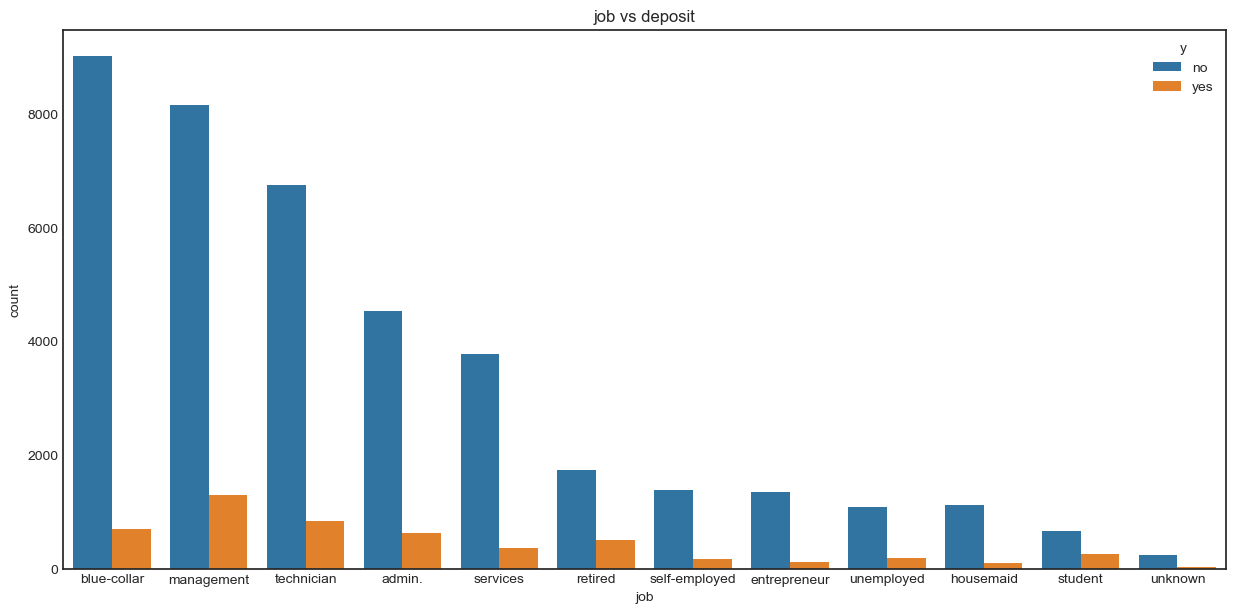

In [2310]:
fig = plt.figure(figsize=(15,7))
sns.countplot(data=df,x='job',hue='y',order=df['job'].value_counts(ascending=False).index)
plt.title('job vs deposit')

# Insights
1. Management is the best clients purchase deposit. This campaign is appropriate with management job type.
2. Blue-collar has the largest number of clients. If you change marketing strategy straight to blue-collar, it prably increase term of deposit.
3. Retired and Student are good to collect more data because distance between yes and no isn't too much.

<AxesSubplot:xlabel='campaign', ylabel='duration'>

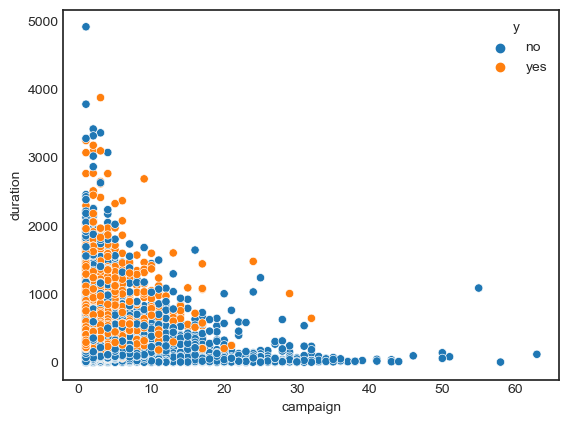

In [2311]:
sns.scatterplot(data=df,x='campaign',y='duration',hue='y')

# Insights
1. It's a good chance to organize campaign in range 0-10 because many client who will back to deposit more is in this period.
2. More than 20 campaign isn't appropriate because it's less client. It will be expesive cost when client is'nt increase.
3. The most client who will deposit more don't like many duration call. You must prepare to call not more than 4000 second in range 0-5 campaign. 

<AxesSubplot:xlabel='age', ylabel='Frequency'>

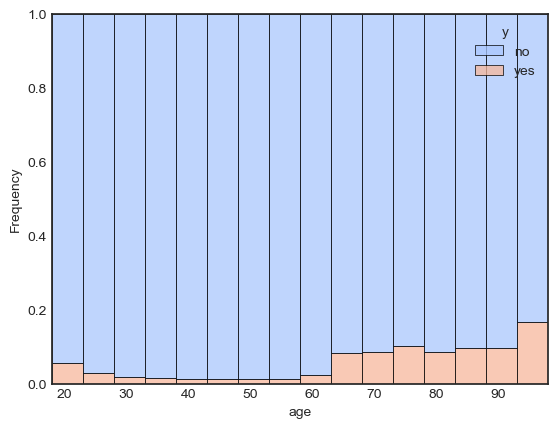

In [2312]:
sns.histplot(data=df,x="age", hue="y",multiple="fill",palette='coolwarm',linewidth=.5,stat='frequency',binwidth=5)

# Insights
1. This campaign is appropriate for client who aged more than 60 years old.
2. This campaign isn't interesting for client who aged between 20-60 years old.

<AxesSubplot:xlabel='education', ylabel='count'>

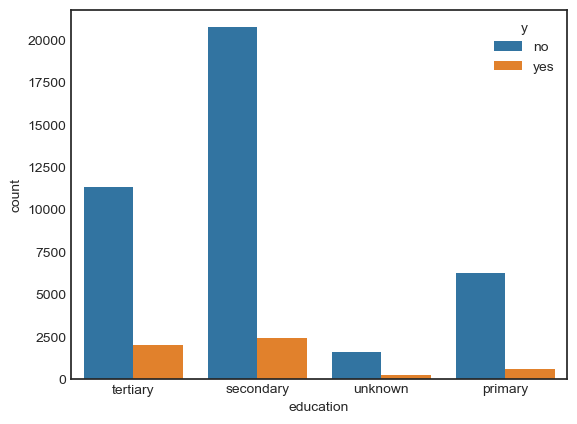

In [2313]:
sns.countplot(x='education',hue='y',data=df)

# Insights
1. Client who graduated secondary or higher than probably your client.
2. It can be assume that unknown and primary doesn't like this campaign.

<AxesSubplot:xlabel='month', ylabel='count'>

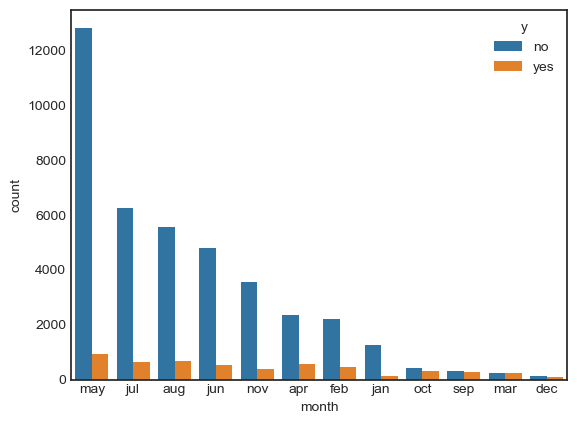

In [2314]:
sns.countplot(x='month',data=df,order=df['month'].value_counts().index,hue='y')

# Insights
1. May is best time to marketing campaign and lot of clients.
2. During the 5th month to the 9th month was a time when there were a lot of client. If we improve strategy and collect more date the campaign during this time and put it in full force, it might be a good time to increase term of deposit.
3. During the 10th month to 12th month it isn't important to make big campaign because client not too much. It' time to make small campaign for save cost.

# Correlation plot of attributes

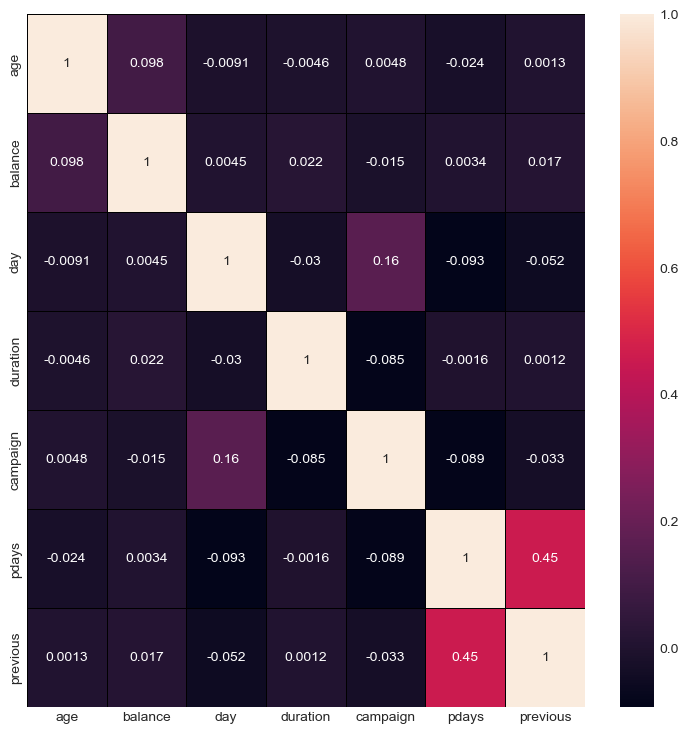

In [2315]:
fig,ax=plt.subplots(figsize=(9,9))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black")
plt.show()

# Insights
1. Previous is collerated with pdays.
2. The indicators have correlation among themselves.
3. Campaign also correlates with day.

# Feature Engineering

# Handling outliers

Let's check numerical feature find outlier remove it using boxplot.

Text(0.5, 1.0, 'previous')

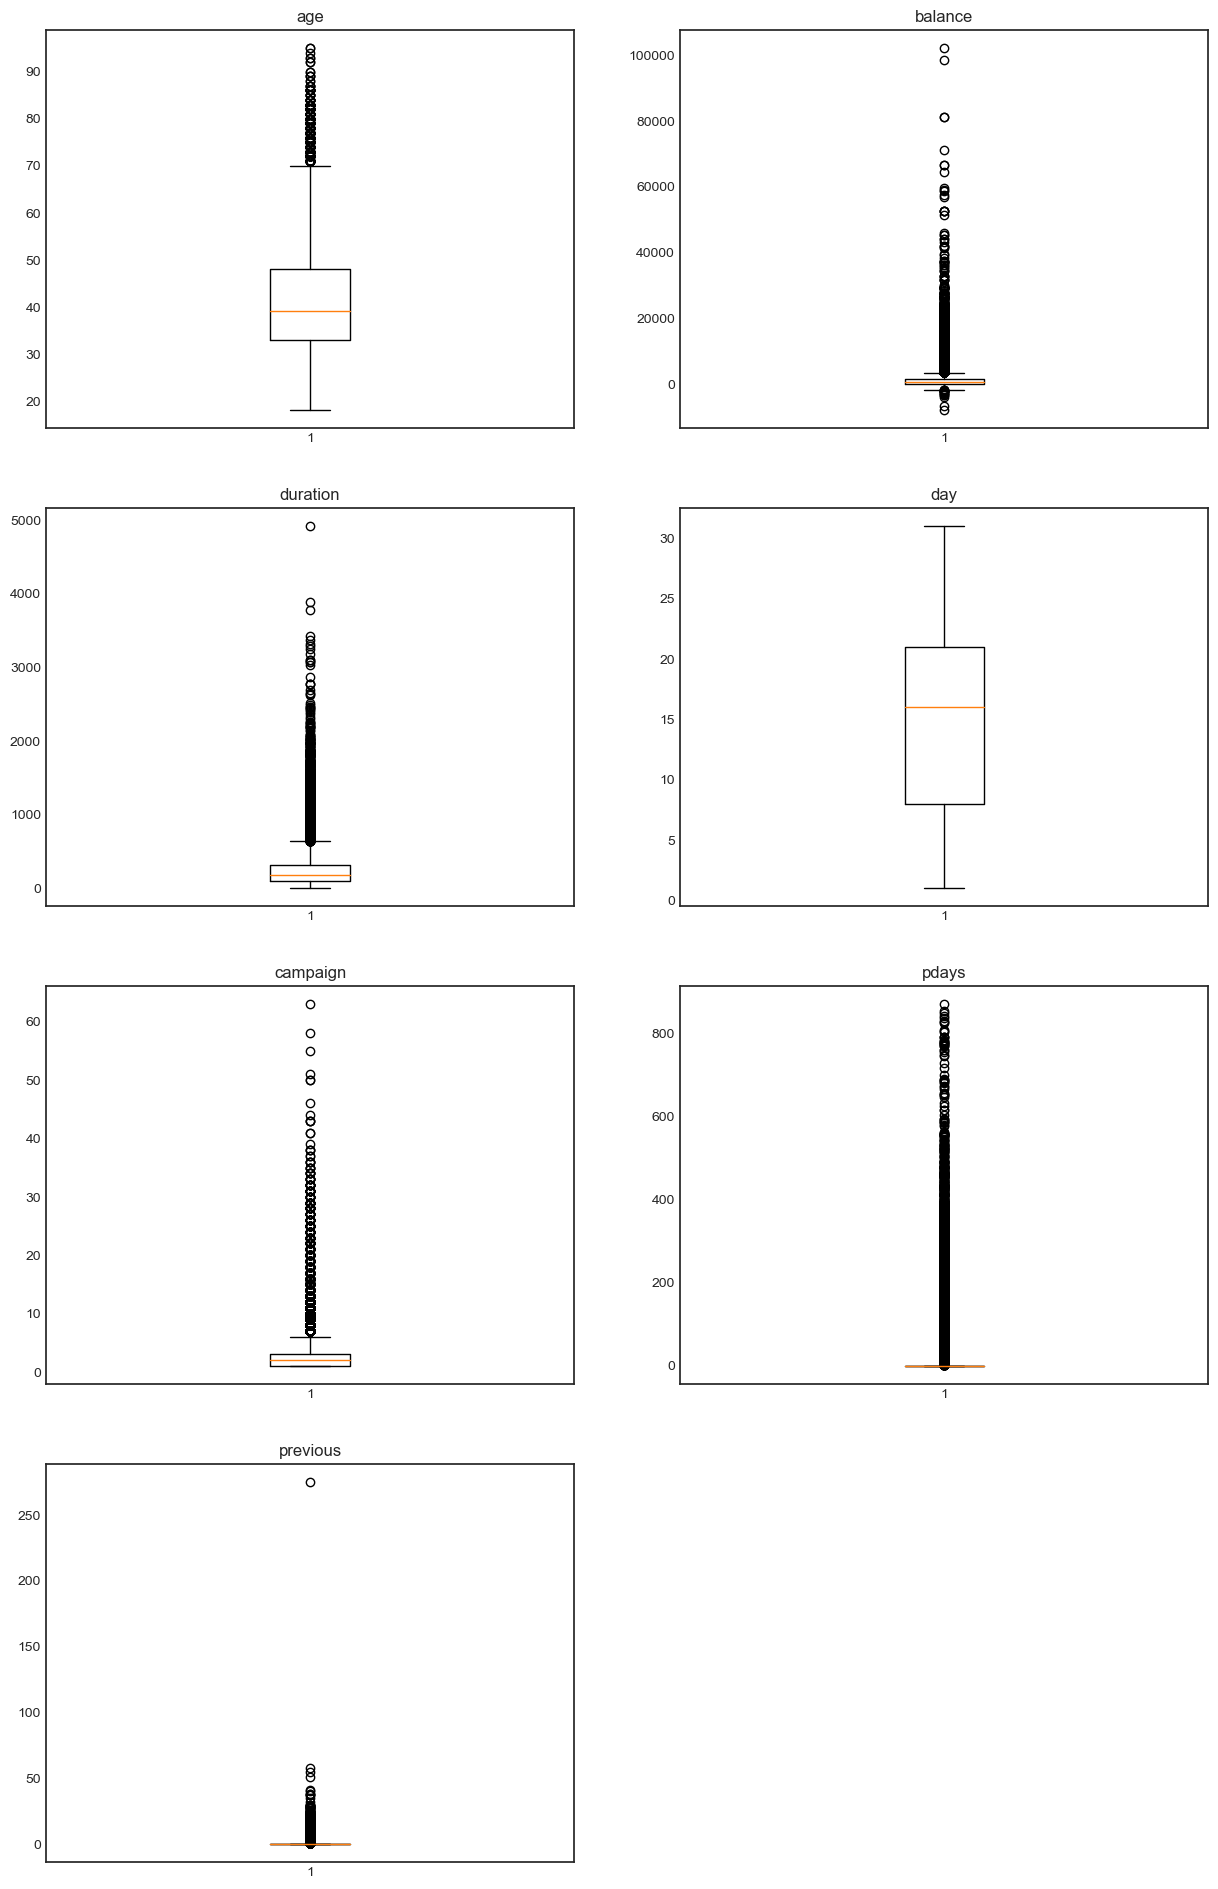

In [2316]:
plt.figure(figsize = (15, 30))
plt.style.use('seaborn-white')
ax=plt.subplot(521)
plt.boxplot(df['age'])
ax.set_title('age')
ax=plt.subplot(522)
plt.boxplot(df['balance'])
ax.set_title('balance')
ax=plt.subplot(523)
plt.boxplot(df['duration'])
ax.set_title('duration')
ax=plt.subplot(524)
plt.boxplot(df['day'])
ax.set_title('day')
ax=plt.subplot(525)
plt.boxplot(df['campaign'])
ax.set_title('campaign')
ax=plt.subplot(526)
plt.boxplot(df['pdays'])
ax.set_title('pdays')
ax=plt.subplot(527)
plt.boxplot(df['previous'])
ax.set_title('previous')

For age,duration,balance,previous and campaign are outliers. So, let's fix these features using IQR method.

In [2317]:
df.drop(df[df['previous'] == 275].index, inplace = True)

In [2318]:
a=['age','duration','balance','campaign']
for cols in a:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (df[cols] >= Q1 - 1.5 * IQR) & (df[cols] <= Q3 + 1.5 *IQR)
    df=df.loc[filter]

Text(0.5, 1.0, 'campaign')

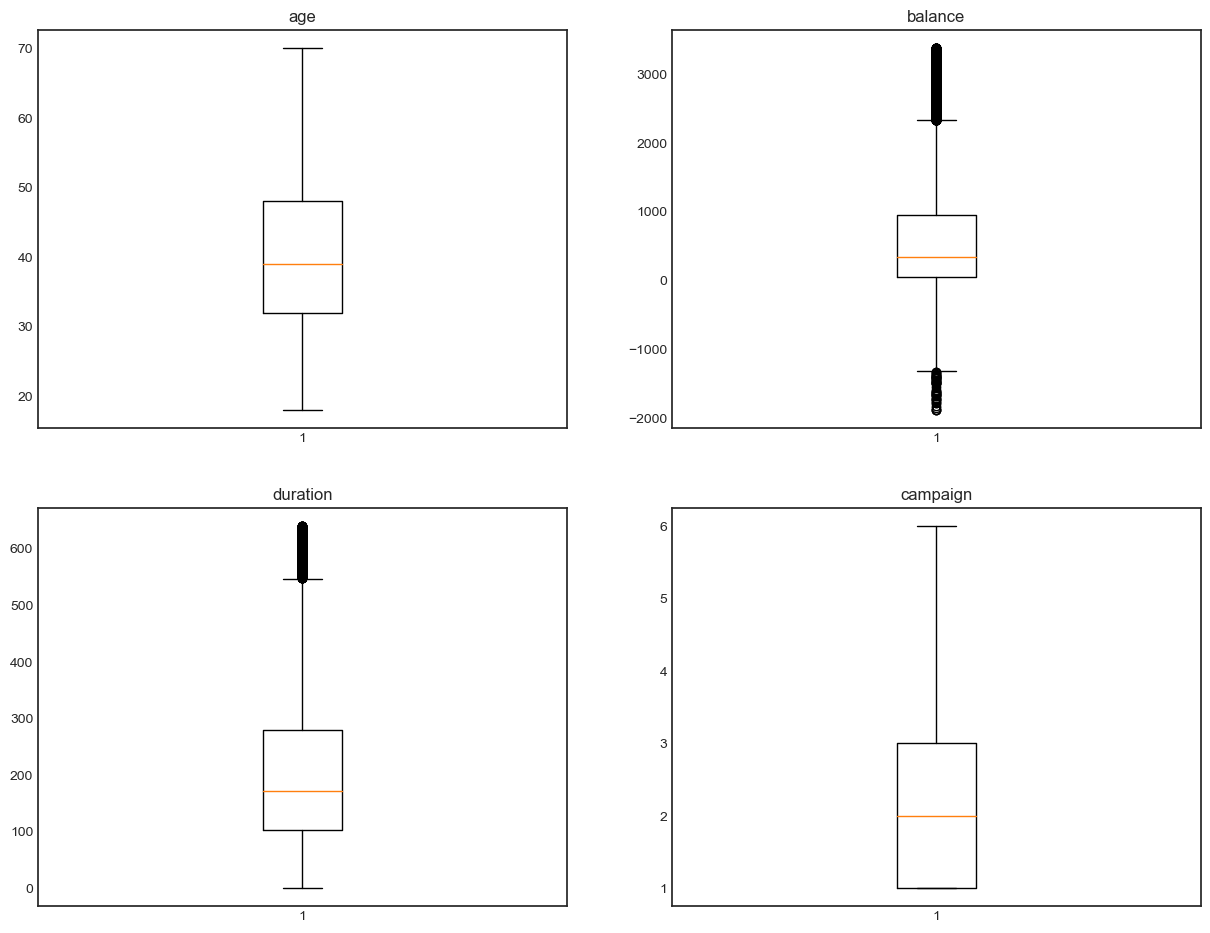

In [2319]:
plt.figure(figsize = (15, 30))
plt.style.use('seaborn-white')
ax=plt.subplot(521)
plt.boxplot(df['age'])
ax.set_title('age')
ax=plt.subplot(522)
plt.boxplot(df['balance'])
ax.set_title('balance')
ax=plt.subplot(523)
plt.boxplot(df['duration'])
ax.set_title('duration')
ax=plt.subplot(524)
plt.boxplot(df['campaign'])
ax.set_title('campaign')

# Encoding Month

Change categorical month to numeric month ex. jan=1,feb=2.....dec=12.

In [2320]:
month_dict={'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
df['month']= df['month'].map(month_dict)
df.loc[:, ['month']].head()

,month
0,5
1,5
2,5
3,5
4,5


# Ordinal Number Encoding

Change the features which has yes,no and unknown. Assign them to yes:1,no:0 and unknown:-1.

In [2321]:
dictionary={'yes':1,'no':0,'unknown':-1}
df['housing']=df['housing'].map(dictionary)
df['default']=df['default'].map(dictionary)
df['loan']=df['loan'].map(dictionary)
df['y']=df['y'].map(dictionary)

In [2322]:
df.loc[:,['housing','default','loan','y']].head()

,housing,default,loan,y
0,1,0,0,0
1,1,0,0,0
2,1,0,1,0
3,1,0,0,0
4,0,0,0,0


In [2323]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,admin.,single,secondary,0,557,0,0,cellular,17,11,224,1,-1,0,unknown,1
45203,23,student,single,tertiary,0,113,0,0,cellular,17,11,266,1,-1,0,unknown,1
45205,25,technician,single,secondary,0,505,0,1,cellular,17,11,386,2,-1,0,unknown,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,11,508,4,-1,0,unknown,0


# Ordinal Encoding

Let's change contact and poutcome to dummy columns and drop them.

In [2324]:
df = pd.concat([df, pd.get_dummies(df['contact'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['poutcome'])], axis=1)
del df['contact']
del df['poutcome']

# Frequency encoding

Let's sum all job and education feature.

In [2325]:
d_job=df['job'].value_counts().to_dict()
d_ed=df['education'].value_counts().to_dict()

In [2326]:
df['job']=df['job'].map(d_job)
df['education']=df['education'].map(d_ed)

In [2327]:
df.loc[:,['job','education']].head()

,job,education
0,6969,9777
1,5862,18303
2,1144,18303
3,7674,1353
4,198,1353


# Target Guided Ordinal Encoding

In [2328]:
df.groupby(['marital'])['y'].mean()

marital
divorced    0.073504
married     0.069326
single      0.114840
Name: y, dtype: float64

In [2329]:
martial_sort=df.groupby(['marital'])['y'].mean().sort_values().index
martial_sort

Index(['married', 'divorced', 'single'], dtype='object', name='marital')

In [2330]:
dict_marital = {'divorced': 0, 'married': 1, 'single': 2}
df['marital_ordinal']=df['marital'].map(dict_marital)
df.drop(['marital'], axis=1, inplace=True)
df.marital_ordinal.value_counts()

1    20584
2     9953
0     4027
Name: marital_ordinal, dtype: int64

In [2331]:
df

,age,job,education,default,balance,housing,loan,day,month,duration,...,previous,y,cellular,telephone,unknown,failure,other,success,unknown,marital_ordinal
0,58,6969,9777,0,2143,1,0,5,5,261,...,0,0,0,0,1,0,0,0,1,1
1,44,5862,18303,0,29,1,0,5,5,151,...,0,0,0,0,1,0,0,0,1,2
2,33,1144,18303,0,2,1,1,5,5,76,...,0,0,0,0,1,0,0,0,1,1
3,47,7674,1353,0,1506,1,0,5,5,92,...,0,0,0,0,1,0,0,0,1,1
4,33,198,1353,0,1,0,0,5,5,198,...,0,0,0,0,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,4172,18303,0,557,0,0,17,11,224,...,0,1,1,0,0,0,0,0,1,2
45203,23,758,9777,0,113,0,0,17,11,266,...,0,1,1,0,0,0,0,0,1,2
45205,25,5862,18303,0,505,0,1,17,11,386,...,0,1,1,0,0,0,0,0,1,2
45209,57,7674,18303,0,668,0,0,17,11,508,...,0,0,0,1,0,0,0,0,1,1


In [2332]:
df.dtypes

age                int64
job                int64
education          int64
default            int64
balance            int64
housing            int64
loan               int64
day                int64
month              int64
duration           int64
campaign           int64
pdays              int64
previous           int64
y                  int64
cellular           uint8
telephone          uint8
unknown            uint8
failure            uint8
other              uint8
success            uint8
unknown            uint8
marital_ordinal    int64
dtype: object

Change type to int.

In [2333]:
data_types_dict = {'cellular': int,'telephone': int,'unknown': int,'failure': int,'other': int,'success': int,'unknown':int}
df = df.astype(data_types_dict)
df.dtypes

age                int64
job                int64
education          int64
default            int64
balance            int64
housing            int64
loan               int64
day                int64
month              int64
duration           int64
campaign           int64
pdays              int64
previous           int64
y                  int64
cellular           int32
telephone          int32
unknown            int32
failure            int32
other              int32
success            int32
unknown            int32
marital_ordinal    int64
dtype: object

# Standardization of numerical variables

In [2334]:
df_scale = df.copy()
Cate_varia = ['job','education','default','balance','housing','loan','day','month','y','cellular','telephone','unknown','failure','other','success','unknown','marital_ordinal']
feature_scale=[feature for feature in df.columns if feature not in Cate_varia]
scaler=StandardScaler()
scaler.fit(df[feature_scale])

StandardScaler()

In [2335]:
scaled_data = pd.concat([df[['job','education','default','balance','housing','loan','day','month','y','cellular','telephone','unknown','failure','other','success','unknown','marital_ordinal']].reset_index(drop=True),pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
axis=1)
scaled_data.head()

,job,education,default,balance,housing,loan,day,month,y,cellular,...,other,success,unknown,unknown,marital_ordinal,age,duration,campaign,pdays,previous
0,6969,9777,0,2143,1,0,5,5,0,0,...,0,0,1,1,1,1.789385,0.391568,-0.857819,-0.419151,-0.307719
1,5862,18303,0,29,1,0,5,5,0,0,...,0,0,1,1,2,0.377521,-0.400409,-0.857819,-0.419151,-0.307719
2,1144,18303,0,2,1,1,5,5,0,0,...,0,0,1,1,1,-0.731800,-0.940393,-0.857819,-0.419151,-0.307719
3,7674,1353,0,1506,1,0,5,5,0,0,...,0,0,1,1,1,0.680064,-0.825196,-0.857819,-0.419151,-0.307719
4,198,1353,0,1,0,0,5,5,0,0,...,0,0,1,1,2,-0.731800,-0.062019,-0.857819,-0.419151,-0.307719


# Feature Selection 

In [2336]:
X=scaled_data.drop(['y'],axis=1)
y=scaled_data.y

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

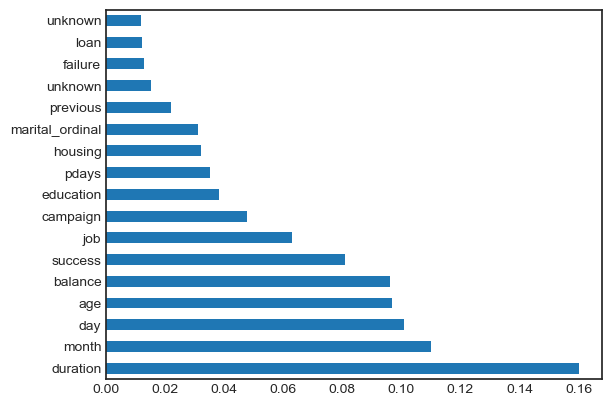

In [2337]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

# Train and Test Split (80:20)

In [2338]:
X=scaled_data.drop(['unknown','unknown','failure','loan','previous','y','marital_ordinal','housing','pdays','education'],axis=1)
y=scaled_data.y

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=22)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (27651, 12)
Input Test: (6913, 12)
Output Training: (27651,)
Output Test: (6913,)


# Logistic regression 

In [2339]:
logreg = LogisticRegression()
logreg

LogisticRegression()

In [2340]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [2341]:
logreg.score(X_train,y_train)

0.924776680771039

In [2342]:
logreg.intercept_

array([-2.74023738])

In [2343]:
logreg.coef_

array([[-1.47626584e-04, -1.43428887e-01,  1.96597960e-04,
        -2.71811574e-02, -6.50278708e-02,  1.46027369e+00,
         6.92261019e-02,  2.25519637e-01,  2.88678743e+00,
         7.48931799e-02,  7.71514269e-01, -5.55989789e-01]])

In [2344]:
Predicted = logreg.predict(X_test)
Predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [2345]:
logreg.score(X_test,y_test)

0.9228988861565167

In [2346]:
logreg.predict_proba(X_test)

array([[0.52922584, 0.47077416],
       [0.95749622, 0.04250378],
       [0.67412082, 0.32587918],
       ...,
       [0.97295309, 0.02704691],
       [0.90385412, 0.09614588],
       [0.98195628, 0.01804372]])

Model accuracy is 0.9228988861565167. Let's use Logistic regression with Hyperparameter tuning for adjust accuracy.

# Logistic regression with Hyperparameter tuning

In [2347]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print("The accuracy of the model is:",best_model.score(X_test,y_test))

The accuracy of the model is: 0.9230435411543468


In [2348]:
confusion_matrix = confusion_matrix(y_test, Predicted)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, Predicted))

Confusion Matrix:
 [[6234   89]
 [ 444  146]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      6323
           1       0.62      0.25      0.35       590

    accuracy                           0.92      6913
   macro avg       0.78      0.62      0.66      6913
weighted avg       0.91      0.92      0.91      6913



# Insights
The Confusion matrix result is telling us that we have 6234+146 correct predictions and 444+146 incorrect predictions.

The Classification report reveals that we have 93% precision which means the accuracy that the model classifier not to label an instance positive that is actually negative which is important as we shouldn't label a lead as positive in making a term deposit when he/she isn't interested in making a deposit.

# ROC curve

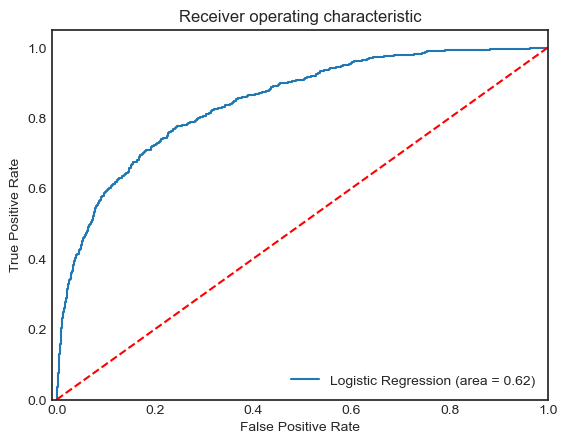

In [2349]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()